In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [5]:
df = pd.read_csv('../../common/assets/dataset.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


<Figure size 1400x800 with 0 Axes>

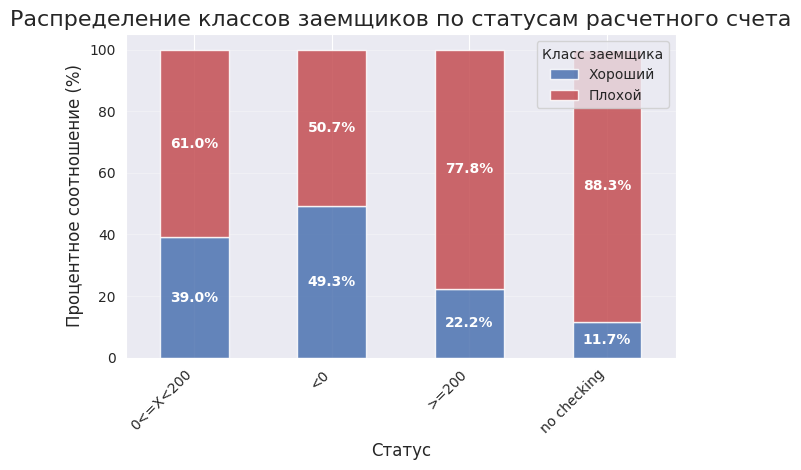

In [5]:
df = pd.read_csv('../../common/assets/dataset.csv')

# Вычисление процентного соотношения
status_class_percentage = pd.crosstab(
    index=df['checking_status'],
    columns=df['class'],
    normalize='index'
) * 100

# Визуализация
plt.figure(figsize=(14, 8))
ax = status_class_percentage.plot(
    kind='bar',
    stacked=True,
    color=['#4c72b0', '#c44e52'],
    edgecolor='w',
    alpha=0.85
)

plt.title('Распределение классов заемщиков по статусам расчетного счета', fontsize=16)
plt.xlabel('Статус', fontsize=12)
plt.ylabel('Процентное соотношение (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Класс заемщика', labels=['Хороший', 'Плохой'])
plt.grid(axis='y', alpha=0.3)

# Добавление аннотаций
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:  # Показываем только значимые проценты
        ax.text(
            x + width/2,
            y + height/2,
            f'{height:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )

plt.tight_layout()
plt.show()